# Exercise Set 13


## Mohaddeseh Mozaffari

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bisect
from math import comb
sns.set()

In [2]:
data = np.loadtxt("fitinput.txt")

In [3]:
x = data[:,0]
y = data[:,1]

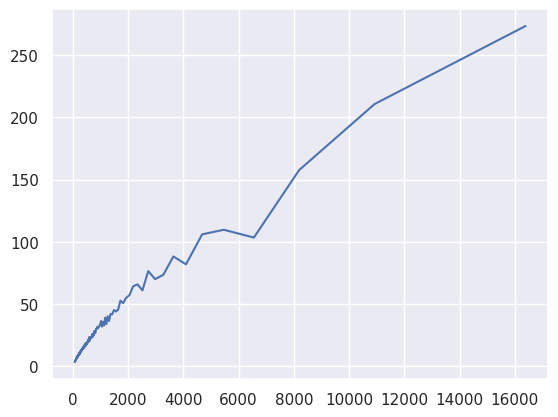

In [4]:
plt.plot(x,y)
plt.show()

# Q1)

In [5]:
def Y(x, a, H):
    """fitting function

    Args:
        x (1d_array): data
        a (float): free parameter
        H (float): free parameter

    Returns:
        1d_array: 
    """
    return a * np.power(x,H)

In [6]:
def chi2(yobs, yth, sigma=1):
    """chi square

    Args:
        yobs (1d_array): observed data
        yth (1d_array): theoritical data
        sigma (int, optional): variance of data. Defaults to 1.

    Returns:
        float: chi^2
    """
    return np.sum((yobs - yth)**2 / sigma)

In [7]:
amin = 0
amax = 1
hmin = 0
hmax = 1
da = 0.001
dh = 0.001

In [8]:
N = int((amax - amin)/da)
N

1000

In [9]:
n = int(np.log(N)/np.log(2)) + 1
n

10

In [10]:
M = 500

In [11]:
a = np.random.uniform(amin, amax, M)
h = np.random.uniform(hmin, hmax, M)
ah = np.array([list(ah) for ah in zip(*[a,h])])

CHI2 = []
for aa , hh in ah:
    CHI2.append(chi2(y, Y(x, aa, hh)))

CHI2 = np.array(CHI2)
L = np.exp(-CHI2/(2*CHI2.max()))
R = L/L.sum()

B = []
for aa , hh in ah:
    A = format(round((2**n - 1) * (aa - amin) /(amax - amin)), '010b')
    H = format(round((2**n - 1) * (hh - hmin) /(hmax - hmin)), '010b')
    B.append([A,H])

In [12]:
conv = 1
p_c = 1
p_m = 0.1

while conv > 0.01:
    B_new = []
    for i in range(M):
        index = bisect.bisect_right(np.cumsum(R), np.random.random())
        B_new.append(B[index])

    for l in range(comb(M,2)):
        r1 = np.random.random()
        if r1 < p_c:
            x1, x2 = np.random.randint(0,M,2)
            crossover_point = np.random.randint(1, n)
            a1 = [str(i) for i in B_new[x1][0]]
            a2 = [str(i) for i in B_new[x2][0]]
            a1[:crossover_point], a2[:crossover_point] = a2[:crossover_point], a1[:crossover_point]
            B_new[x1][0] = str(''.join(a1))
            B_new[x2][0] = str(''.join(a2))

            h1 = [str(i) for i in B_new[x1][1]]
            h2 = [str(i) for i in B_new[x2][1]]
            h1[:crossover_point], h2[:crossover_point] = h2[:crossover_point], h1[:crossover_point]
            B_new[x1][1] = str(''.join(h1))
            B_new[x2][1] = str(''.join(h2))
            
    for j in range(M):
        r2 = np.random.random()
        if r2 < p_m:
            x3 = np.random.randint(0, n)
            a3 = [str(i) for i in B_new[j][0]]
            h3 = [str(i) for i in B_new[j][1]]
            if a3[x3] == "1":
                a3[x3] = "0"
            else:
                a3[x3] = "1"

            if h3[x3] == "1":
                h3[x3] = "0"
            else:
                h3[x3] = "1"

            B_new[j][0] = str(''.join(a3))
            B_new[j][1] = str(''.join(h3))

    decode = []
    for aa , hh in B_new:
        A = amin + int(aa, 2)*(amax - amin)/ (2**n - 1)
        H = hmin + int(hh, 2)*(hmax - hmin)/ (2**n - 1)
        decode.append([A,H])

    CHI2_new = []
    for aa , hh in decode:
        CHI2_new.append(chi2(y, Y(x, aa, hh)))
    
    CHI2_new = np.array(CHI2_new)
    L_new = np.exp(-CHI2_new/(2*CHI2_new.max()))
    R_new = L_new/L_new.sum()

    conv = abs(L_new.sum() - L.sum())

    B = B_new
    R = R_new
    L = L_new
    p_c -= 0.05
    p_m -= 0.001

In [13]:
decode

[[0.3304007820136852, 0.4633431085043988],
 [0.2883675464320626, 0.7693059628543499],
 [0.2883675464320626, 0.7693059628543499],
 [0.3304007820136852, 0.4633431085043988],
 [0.5483870967741935, 0.04594330400782014],
 [0.43206256109481916, 0.2854349951124145],
 [0.43206256109481916, 0.2854349951124145],
 [0.2570869990224829, 0.8142717497556208],
 [0.5483870967741935, 0.04594330400782014],
 [0.5483870967741935, 0.04594330400782014],
 [0.750733137829912, 0.6021505376344086],
 [0.2883675464320626, 0.7693059628543499],
 [0.5483870967741935, 0.04594330400782014],
 [0.9286412512218963, 0.007820136852394917],
 [0.43206256109481916, 0.2854349951124145],
 [0.43206256109481916, 0.2854349951124145],
 [0.750733137829912, 0.6021505376344086],
 [0.5483870967741935, 0.04594330400782014],
 [0.10752688172043011, 0.18866080156402737],
 [0.198435972629521, 0.4066471163245357],
 [0.5483870967741935, 0.04594330400782014],
 [0.2883675464320626, 0.7693059628543499],
 [0.43206256109481916, 0.2854349951124145],

In [14]:
decode

[[0.3304007820136852, 0.4633431085043988],
 [0.2883675464320626, 0.7693059628543499],
 [0.2883675464320626, 0.7693059628543499],
 [0.3304007820136852, 0.4633431085043988],
 [0.5483870967741935, 0.04594330400782014],
 [0.43206256109481916, 0.2854349951124145],
 [0.43206256109481916, 0.2854349951124145],
 [0.2570869990224829, 0.8142717497556208],
 [0.5483870967741935, 0.04594330400782014],
 [0.5483870967741935, 0.04594330400782014],
 [0.750733137829912, 0.6021505376344086],
 [0.2883675464320626, 0.7693059628543499],
 [0.5483870967741935, 0.04594330400782014],
 [0.9286412512218963, 0.007820136852394917],
 [0.43206256109481916, 0.2854349951124145],
 [0.43206256109481916, 0.2854349951124145],
 [0.750733137829912, 0.6021505376344086],
 [0.5483870967741935, 0.04594330400782014],
 [0.10752688172043011, 0.18866080156402737],
 [0.198435972629521, 0.4066471163245357],
 [0.5483870967741935, 0.04594330400782014],
 [0.2883675464320626, 0.7693059628543499],
 [0.43206256109481916, 0.2854349951124145],